<a href="https://colab.research.google.com/github/meenuraji/S15/blob/master/S15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from datetime import datetime 
print("Current Date/Time: ", datetime.now())

Current Date/Time:  2020-05-25 06:43:50.364433


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!pip install git+https://github.com/arraiyopensource/kornia
from kornia.losses import SSIM

  Cloning https://github.com/arraiyopensource/kornia to /tmp/pip-req-build-g15t4u4p
  Running command git clone -q https://github.com/arraiyopensource/kornia /tmp/pip-req-build-g15t4u4p
  Created wheel for kornia: filename=kornia-0.3.2+df93618-py2.py3-none-any.whl size=174640 sha256=c207b46ed20ca8a2c06d411245ee9f535ed6a5b3c478ea7287383bcb994a750c
  Stored in directory: /tmp/pip-ephem-wheel-cache-h4oj19hr/wheels/a0/47/86/854e2f9a801b368f296cb25f167cbd56aa805f974b15421a67
Successfully built kornia


In [0]:
cd 'drive/My Drive'

/content/drive/My Drive


In [0]:
import torch
import json
import torchvision
import torchvision.models as models
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.tensorboard import SummaryWriter
from tqdm import tqdm_notebook, tnrange
import numpy as np
import matplotlib.pyplot as plt
import io
from itertools import groupby
import cv2
from tqdm.auto import tqdm
from pathlib import Path
from time import time
from torchvision import datasets
from torch.utils.data import DataLoader, Dataset , random_split
from PIL import Image
from torchvision.transforms import transforms
import os
from glob import glob
import torch
import torchvision
from torch import nn
from torch.optim.lr_scheduler import StepLR

import s15utils
from s15getfile import getfiles
from s15dataset import MasterDataset
from dnn15 import Net, ConvGen
from s15summary import torch_summarize
from torchsummary import summary
from s15train import train, saveimage

In [0]:
BG_dir = '/content/drive/My Drive/bg/'
BGFG_dir ='/content/drive/My Drive/fg_bg/'
MSK_dir ='/content/drive/My Drive/fg_bg_mask/'
DP_dir ='/content/drive/My Drive/depth/'

In [0]:
fg_bg_files= getfiles(BGFG_dir)
ms_bg_files= getfiles(MSK_dir)
dp_files= getfiles(DP_dir)
bg_files= getfiles(BG_dir)

Total No of image is:  101171
Total No of image is:  62949
Total No of image is:  119753
Total No of image is:  100


In [0]:


channel_means = (0.49139968, 0.48215841, 0.44653091)
channel_stdevs = (0.24703223, 0.24348513, 0.26158784)
# Train Phase transformations
#mean, std = torch.tensor([0.5,0.5,0.5])*255,torch.tensor([0.2,0.2,0.2])*255
train_transforms = transforms.Compose([
                                       transforms.Resize((128,128)),
                                       transforms.Grayscale(num_output_channels=3),
                                       transforms.ToTensor()
])


fillmeans = (np.array(channel_means)).astype(np.uint8)



# Test Phase transformations
test_transforms = transforms.Compose([transforms.Normalize(mean=channel_means, std=channel_stdevs)])

In [0]:

train_ds = MasterDataset(train_transforms, bg_files, fg_bg_files, ms_bg_files, dp_files)
test_ds = MasterDataset(test_transforms, bg_files, fg_bg_files)

In [0]:
print(len(train_ds.bg_files))
print(len(train_ds.ms_bg_files))
print(len(train_ds.fg_bg_files))
print(len(train_ds.dp_files))

100
62949
101171
119753


In [0]:

train_loader = DataLoader(train_ds, batch_size=16, shuffle=True, pin_memory=True)

# test dataloader
test_loader = DataLoader(test_ds, batch_size=16, shuffle=True, pin_memory=True)

In [0]:

model = ConvGen()
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model= model.to(device)
#print(model)
#summary(model, (3, 64, 64))
print(sum(p.numel() for p in model.parameters() if p.requires_grad))

305728


In [0]:
#PATH= './saved_models/'
#model.load_state_dict(torch.load(PATH + '0.pth'))
PATH= Path('/content/drive/My Drive/S15') 
PATH.mkdir(exist_ok= True)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch : 1 [0/100 (0%)]	Loss: 2.025322


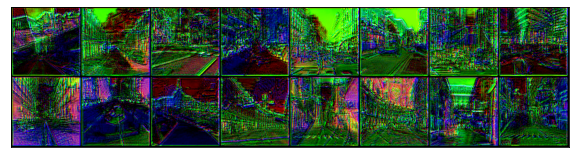

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


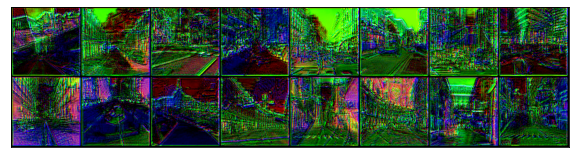

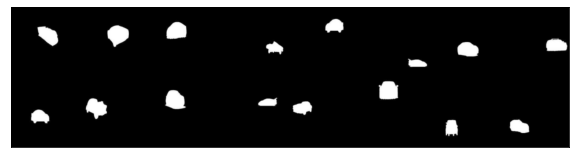

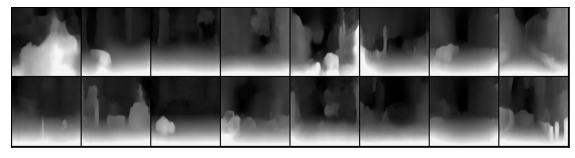

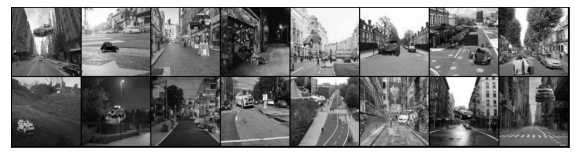

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch : 2 [0/100 (0%)]	Loss: 1.175762


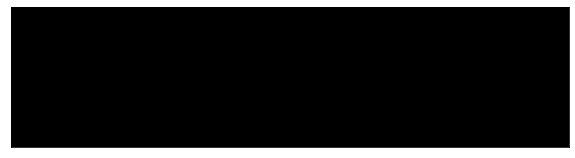

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


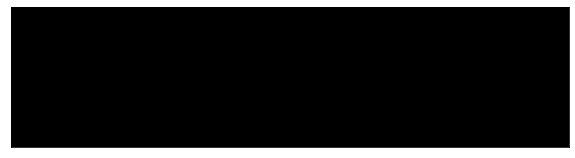

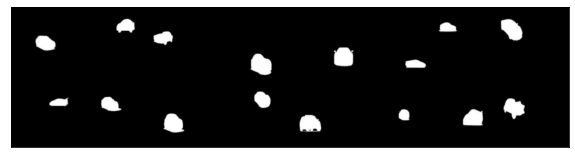

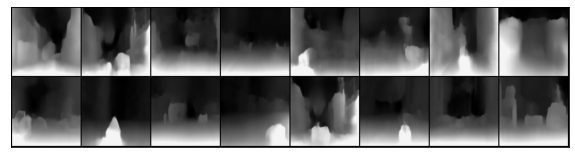

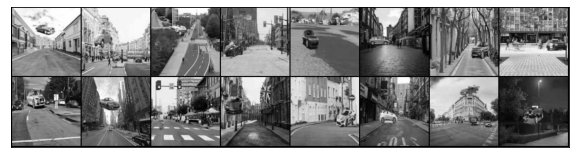

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch : 3 [0/100 (0%)]	Loss: 1.143931


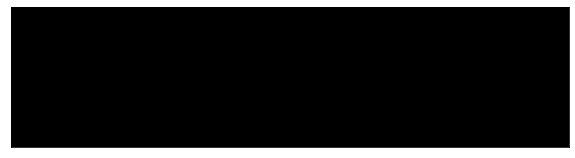

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


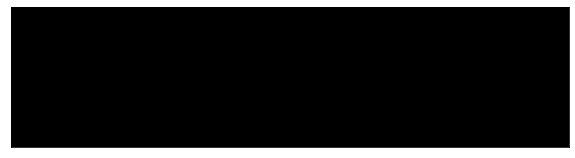

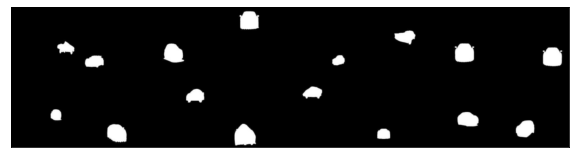

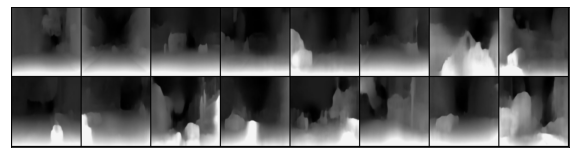

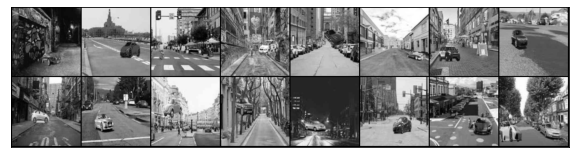

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch : 4 [0/100 (0%)]	Loss: 1.254610


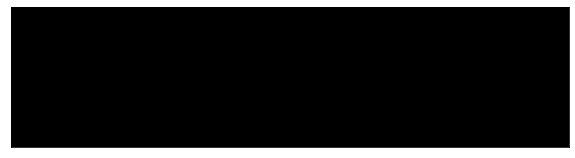

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


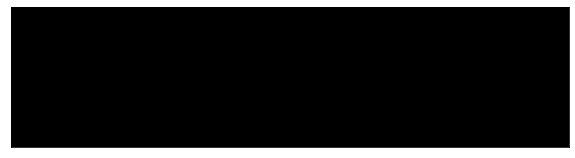

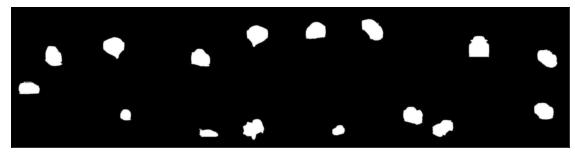

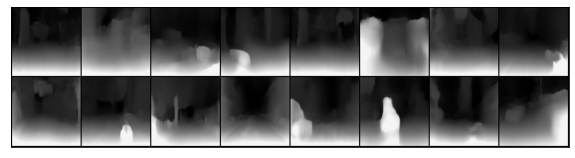

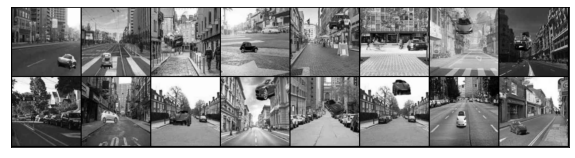

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch : 5 [0/100 (0%)]	Loss: 1.246342


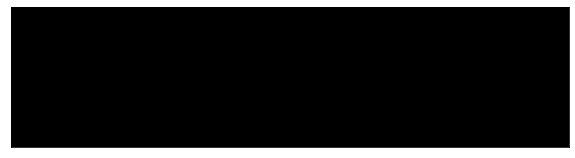

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


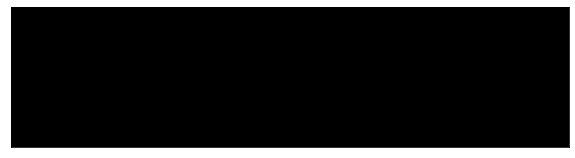

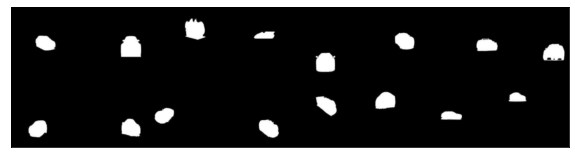

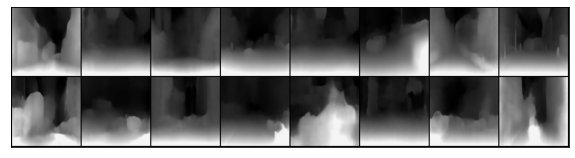

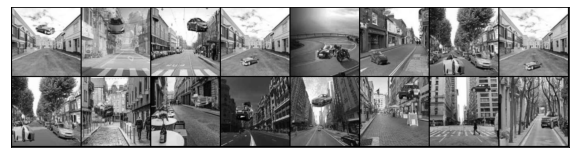

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch : 6 [0/100 (0%)]	Loss: 1.209041


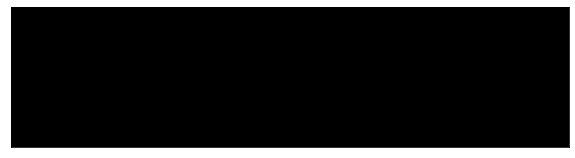

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


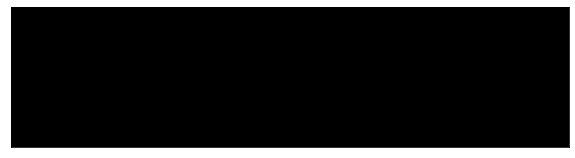

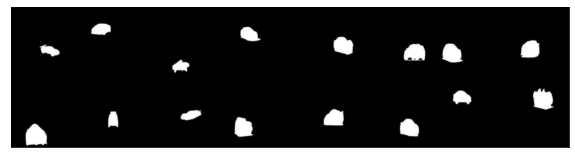

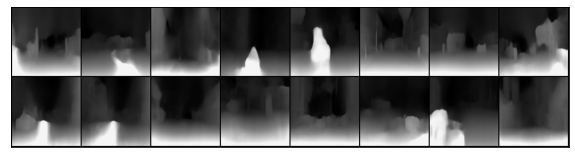

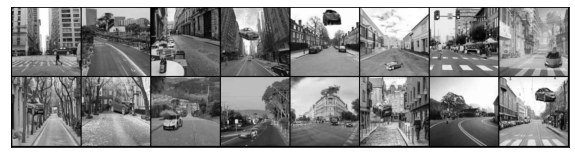

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch : 7 [0/100 (0%)]	Loss: 1.233165


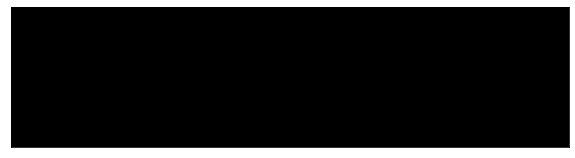

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


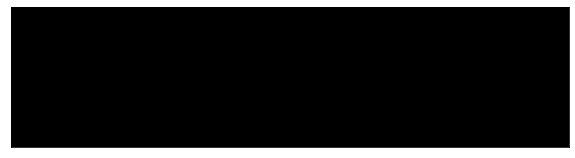

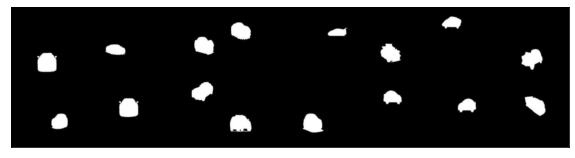

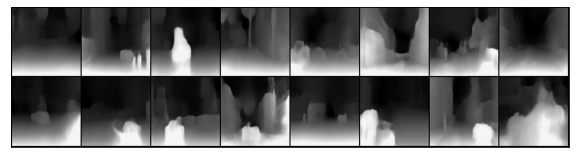

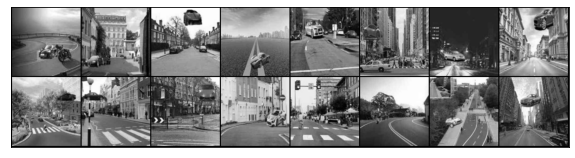

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch : 8 [0/100 (0%)]	Loss: 1.188459


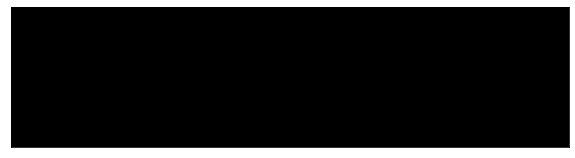

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


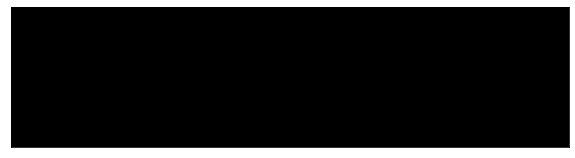

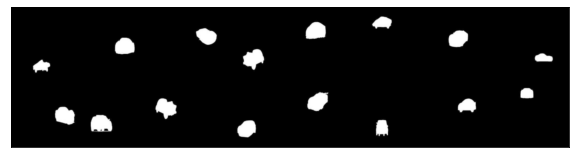

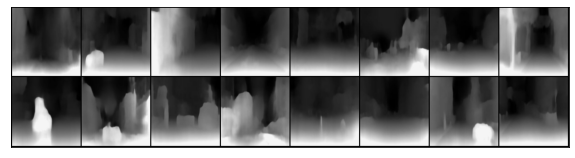

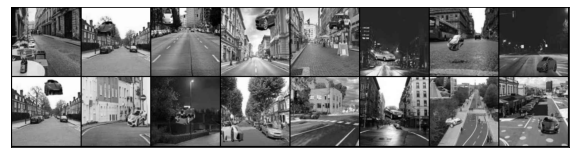

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch : 9 [0/100 (0%)]	Loss: 1.157023


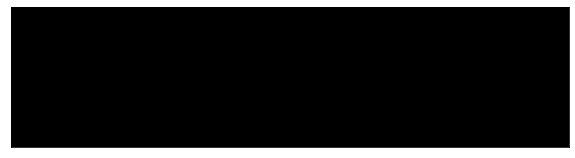

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


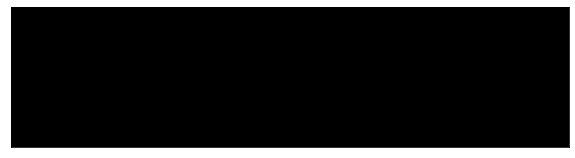

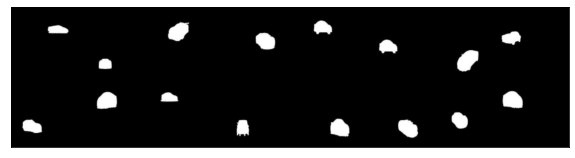

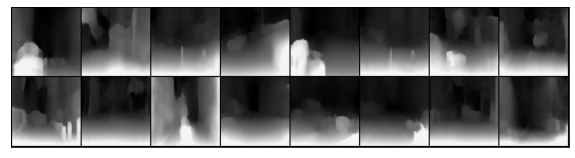

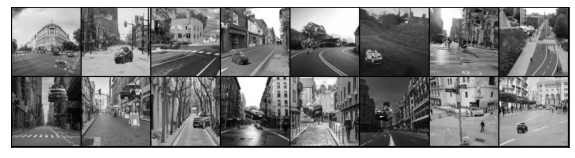

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch : 10 [0/100 (0%)]	Loss: 1.259028


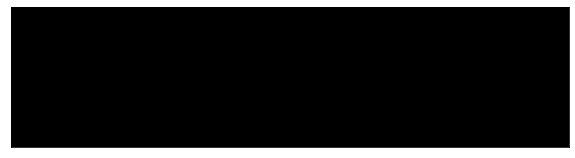

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


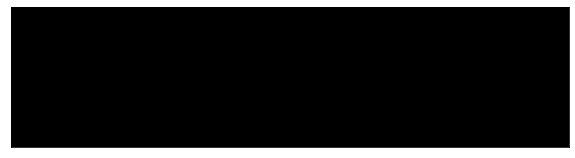

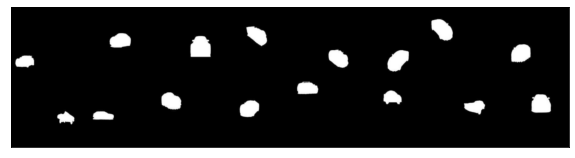

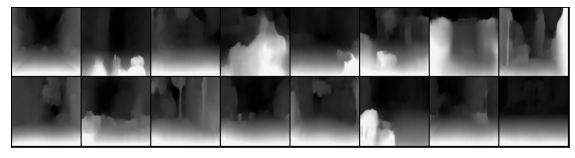

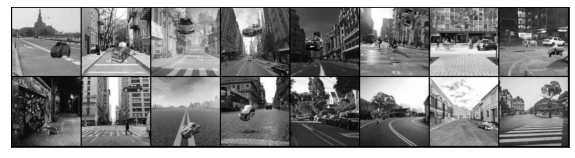

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch : 11 [0/100 (0%)]	Loss: 1.245049


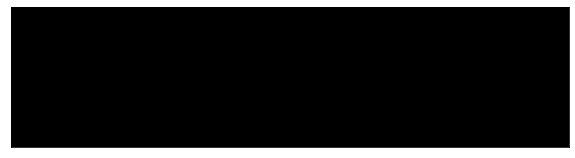

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


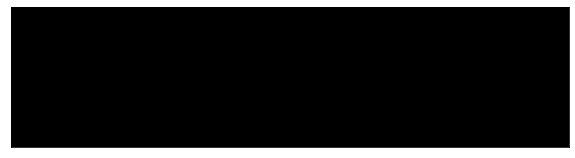

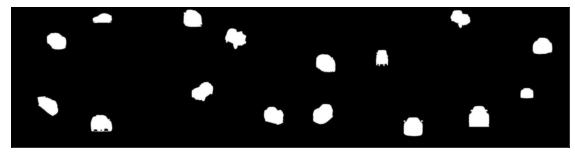

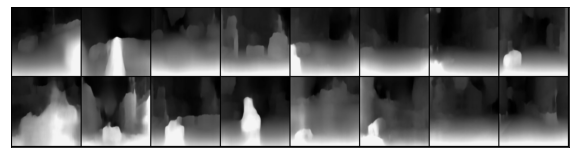

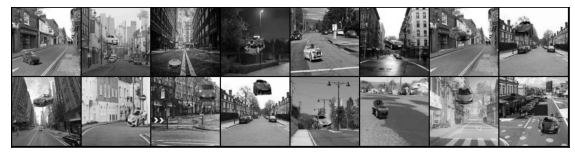

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch : 12 [0/100 (0%)]	Loss: 1.218508


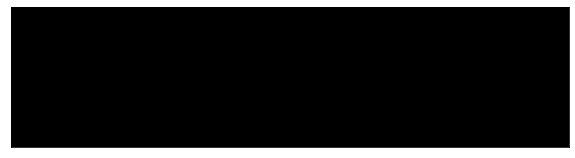

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


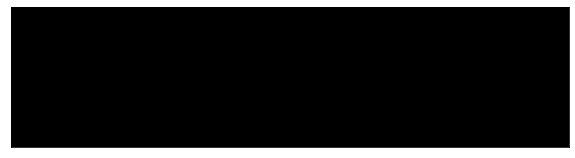

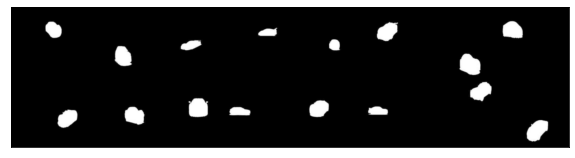

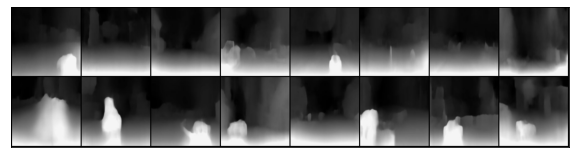

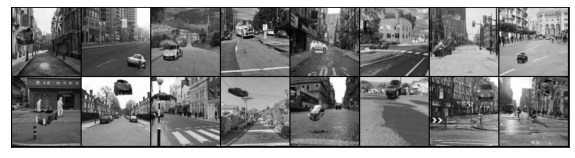

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch : 13 [0/100 (0%)]	Loss: 1.204946


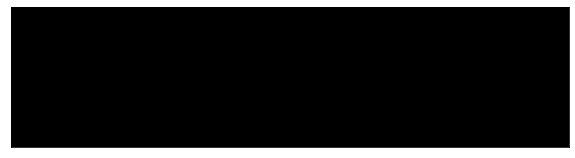

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


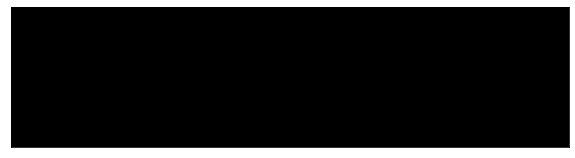

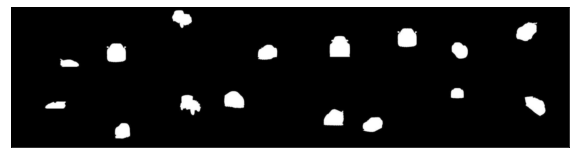

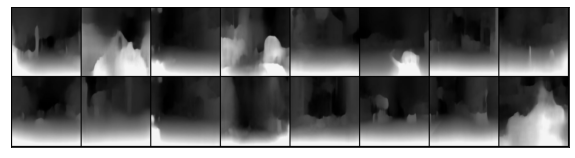

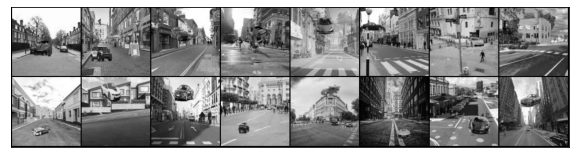

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch : 14 [0/100 (0%)]	Loss: 1.231249


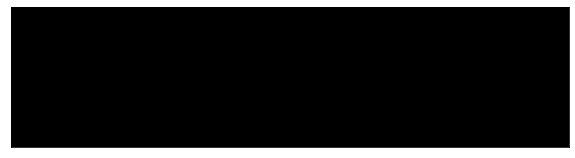

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


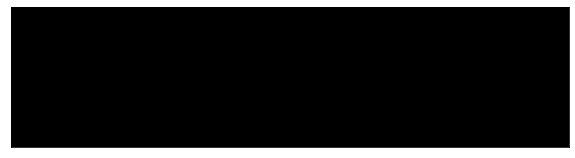

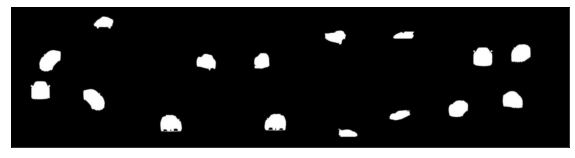

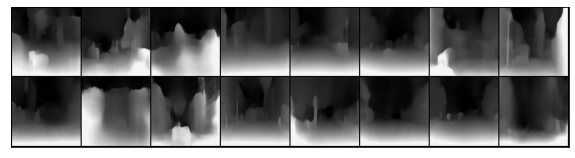

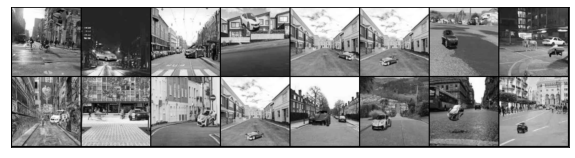

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch : 15 [0/100 (0%)]	Loss: 1.258239


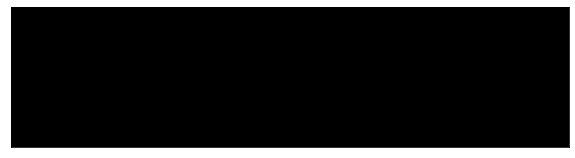

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


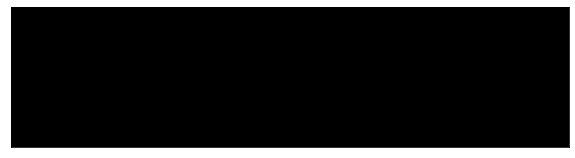

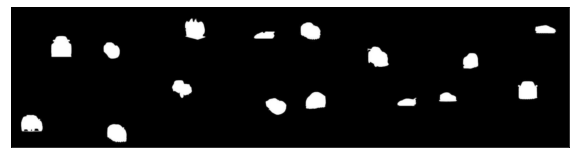

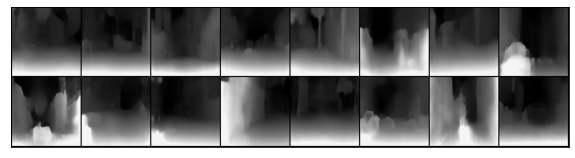

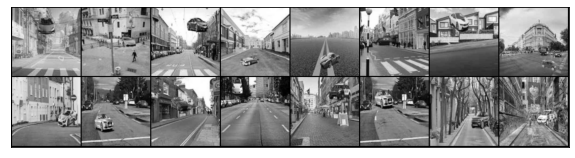

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch : 16 [0/100 (0%)]	Loss: 1.148357


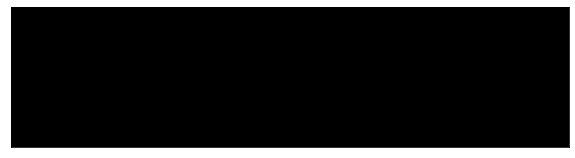

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


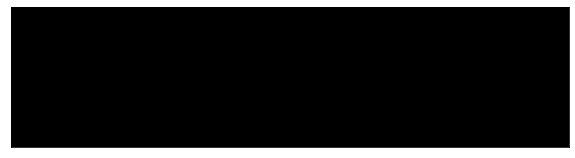

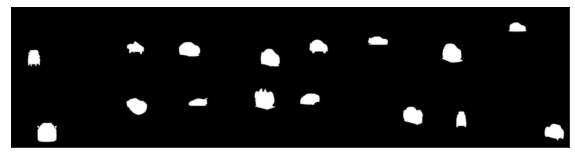

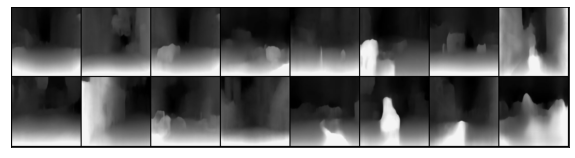

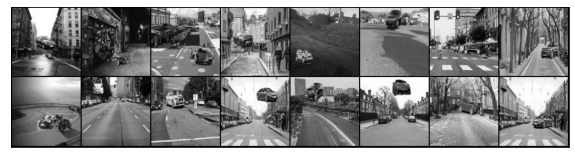

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch : 17 [0/100 (0%)]	Loss: 1.105277


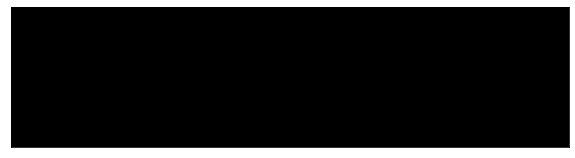

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


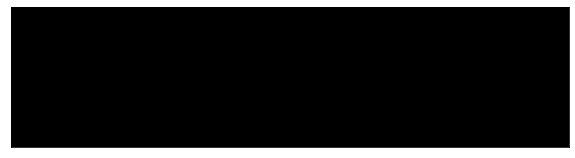

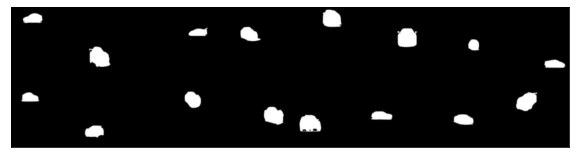

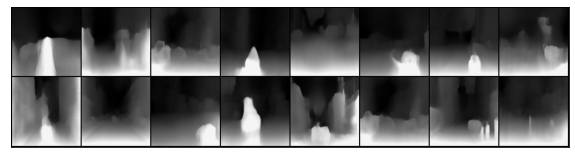

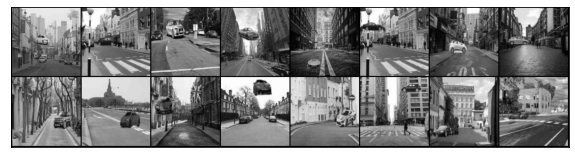

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch : 18 [0/100 (0%)]	Loss: 1.184977


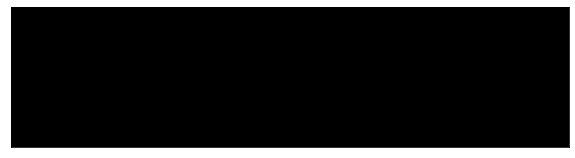

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


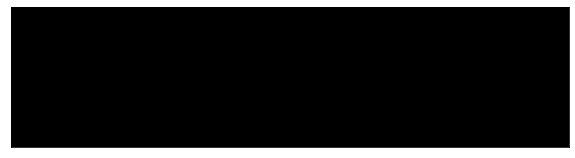

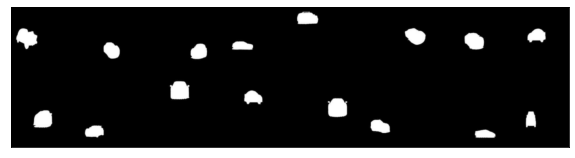

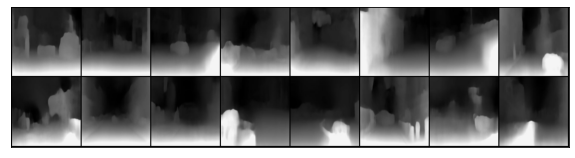

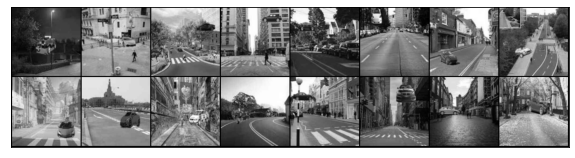

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch : 19 [0/100 (0%)]	Loss: 1.134928


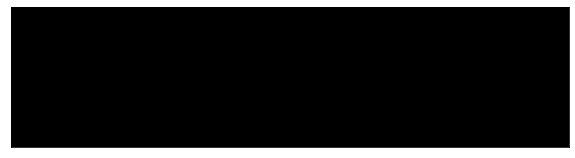

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


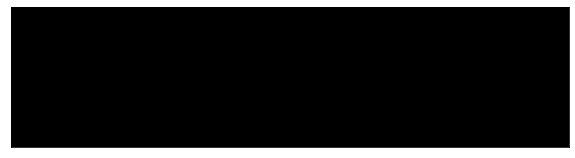

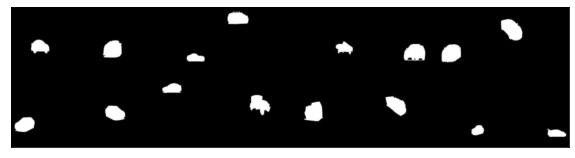

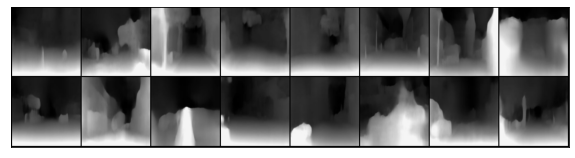

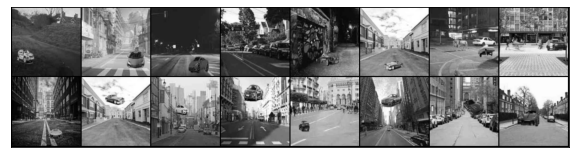

In [0]:
criterion1 = nn.BCEWithLogitsLoss()
criterion2 = SSIM(3, reduction="mean" )
optim = torch.optim.SGD(model.parameters(), lr = 0.01, momentum = 0.9, weight_decay = 1e-5)
scheduler= StepLR(optim, step_size=1, gamma= 0.01)

for epoch in range(1,20):
    train(model, scheduler, criterion1,criterion2,device, train_loader, optim, epoch)
    scheduler.step()
